In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [109]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [110]:
data_2 = pd.read_csv('test.csv')
data_2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [111]:
new_data_2 = data_2

In [112]:
new_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [145]:
new_data_2.drop(['Cabin','Embarked','SibSp','Pclass','Ticket'], axis='columns',inplace=True)
new_data_2.head()

,PassengerId,Name,Sex,Age,Parch,Fare
0,892,"Kelly, Mr. James",male,34.5,0,7.8292
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,0,7.0000
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,9.6875
3,895,"Wirz, Mr. Albert",male,27.0,0,8.6625
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,12.2875


In [148]:
new_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    object 
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [149]:
new_data_2['Fare'] = new_data_2['Fare'].fillna(new_data_2.Fare.mean())

In [150]:
new_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    object 
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [113]:
new_data = data 

In [114]:
# new_data.drop(['Parch','Embarked','Pclass','SibSp','Name','Ticket','Cabin'], axis='columns', inplace=True)
# new_data.head()

In [115]:
new_data.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [116]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [117]:
new_data['Age'] = data['Age'].fillna(0)

In [118]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data visualization

In [119]:
new_data_1 = data.corr()

In [120]:
new_data_1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.038125,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.010539,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.361353,0.083081,0.018443,-0.549500
Age,0.038125,0.010539,-0.361353,1.000000,-0.184664,-0.048786,0.135516
SibSp,-0.057527,-0.035322,0.083081,-0.184664,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.048786,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.135516,0.159651,0.216225,1.000000


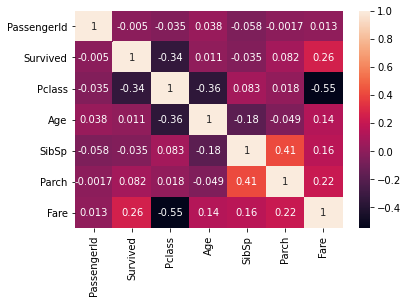

In [121]:
ax = sns.heatmap(new_data_1,annot=True)

In [122]:
new_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

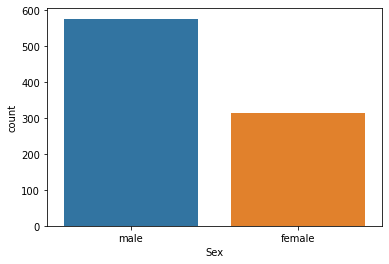

In [123]:
sns.countplot(x = 'Sex', data = new_data)
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

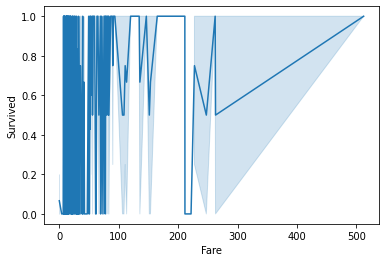

In [147]:
sns.lineplot(x="Fare",y="Survived",data=new_data)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

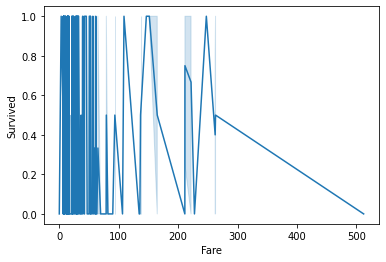

In [152]:
#test data
testdata = new_data_2['Fare']
survive = new_data['Survived']
sns.lineplot(x=testdata,y=survive,data=new_data_2)

# Transform sex data into catagorical data for better operation

In [124]:
dummies = pd.get_dummies(new_data.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [125]:
new_data = pd.concat([new_data, dummies],axis='columns')
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [126]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [127]:
new_data.drop(['Sex','Cabin','PassengerId','Name','Parch','Pclass'], axis='columns', inplace=True)
new_data.head()

,Survived,Age,SibSp,Ticket,Fare,Embarked,female,male
0,0,22.0,1,A/5 21171,7.2500,S,0,1
1,1,38.0,1,PC 17599,71.2833,C,1,0
2,1,26.0,0,STON/O2. 3101282,7.9250,S,1,0
3,1,35.0,1,113803,53.1000,S,1,0
4,0,35.0,0,373450,8.0500,S,0,1


In [128]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Ticket    891 non-null    object 
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
 6   female    891 non-null    uint8  
 7   male      891 non-null    uint8  
dtypes: float64(2), int64(2), object(2), uint8(2)
memory usage: 43.6+ KB


In [129]:
new_data.drop(['SibSp','Embarked','Ticket'], axis='columns', inplace=True)
new_data.head()

,Survived,Age,Fare,female,male
0,0,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,1,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,0,35.0,8.0500,0,1


In [130]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
 3   female    891 non-null    uint8  
 4   male      891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(2)
memory usage: 22.7 KB


# Decision tree for prediction 

In [131]:
X = np.array(new_data.iloc[:, 1:5])

In [132]:
X

array([[22.    ,  7.25  ,  0.    ,  1.    ],
       [38.    , 71.2833,  1.    ,  0.    ],
       [26.    ,  7.925 ,  1.    ,  0.    ],
       ...,
       [ 0.    , 23.45  ,  1.    ,  0.    ],
       [26.    , 30.    ,  0.    ,  1.    ],
       [32.    ,  7.75  ,  0.    ,  1.    ]])

In [133]:
X_1 = np.reshape(X,(-1,1))

In [134]:
X_1

array([[22.  ],
       [ 7.25],
       [ 0.  ],
       ...,
       [ 7.75],
       [ 0.  ],
       [ 1.  ]])

In [135]:
Y = np.array(new_data.iloc[:, 0])
Y_1 = np.reshape(Y,(-1,1))

In [136]:
Y_1

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [137]:
X_train, X_test,Y_train,Y_test = train_test_split(X_1[0:891],Y_1, test_size = 0.5, random_state = 100)

In [138]:
clf = DecisionTreeClassifier(random_state = 100,max_depth=3, min_samples_leaf=5)

In [139]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [140]:
y_pred = clf.predict(X_test[0:418])

In [141]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [142]:
new_data_2['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [154]:
new_data_2['Survived'] = y_pred

In [155]:
new_data_2.head()

,PassengerId,Name,Sex,Age,Parch,Fare,Survived
0,892,"Kelly, Mr. James",male,34.5,0,7.8292,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,0,7.0000,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,9.6875,0
3,895,"Wirz, Mr. Albert",male,27.0,0,8.6625,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,12.2875,0


In [156]:
new_data_2.drop(['Name','Sex','Age','Parch','Fare'], axis="columns",inplace=True)
new_data_2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [98]:
print("Confusion Matrix: ",
        confusion_matrix(Y_test[0:418], y_pred))

Confusion Matrix:  [[232  10]
 [170   6]]


In [99]:
print ("Accuracy : ",
    accuracy_score(Y_test[0:418],y_pred)*100)

Accuracy :  56.9377990430622


In [100]:
 print("Report : ",
    classification_report(Y_test[0:418], y_pred))

Report :                precision    recall  f1-score   support

           0       0.58      0.96      0.72       242
           1       0.38      0.03      0.06       176

    accuracy                           0.57       418
   macro avg       0.48      0.50      0.39       418
weighted avg       0.49      0.57      0.44       418



# Logistic Regression 

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logRegr = LogisticRegression()

In [78]:
logRegr.fit(X_train,Y_train)

c:\users\shrey\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [101]:
logRegr.predict(X_test[0:418])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [102]:
score = logRegr.score(X_test[0:418],Y_test[0:418])

In [103]:
print(score*100)

58.3732057416268


In [157]:
new_data_2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [159]:
new_data_2['Survived'].unique()

array([0, 1], dtype=int64)

In [160]:
new_data_2.to_csv("Submission3.csv",index=None)